# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/xrp_train_8_2.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,0.20254
2020-06-02,0.21090
2020-06-03,0.20316
2020-06-04,0.20411
2020-06-05,0.20438


In [3]:
df_test = pd.read_csv("../../../Dataset/xrp_test_8_2.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2022-01-07,0.77904
2022-01-08,0.76271
2022-01-09,0.74478
2022-01-10,0.75294
2022-01-11,0.74011


# Vẽ đồ thị

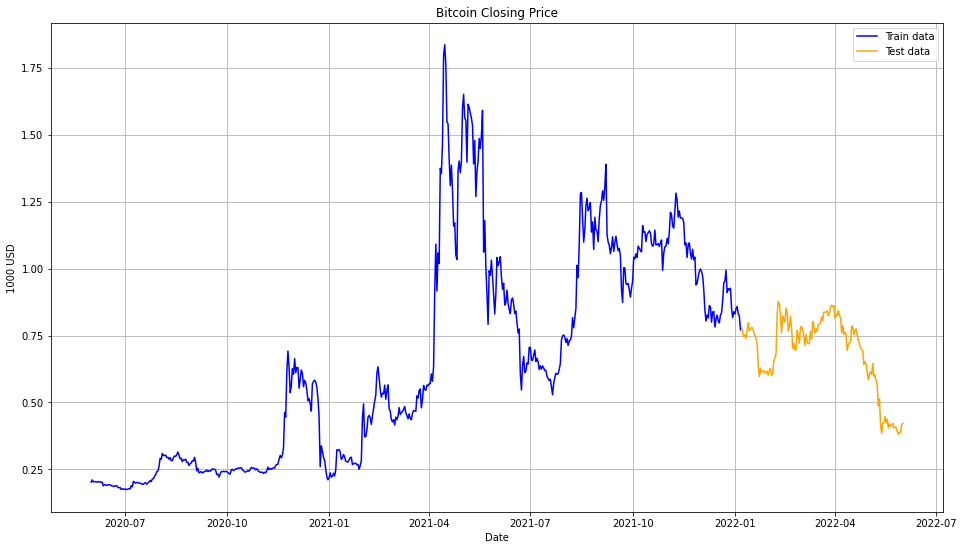

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(585, 1)
(146, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,0.20254
2020-06-02,0.21090
2020-06-03,0.20316
2020-06-04,0.20411
2020-06-05,0.20438
...,...
2022-01-02,0.85003
2022-01-03,0.85867
2022-01-04,0.83183


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1613.189, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1614.082, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1614.489, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1614.455, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1615.931, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1612.495, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.187 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 808.965
Date:                Sun, 26 Jun 2022   AIC                          -1615.931
Time:                        15:14:39   BIC                          -1611.561
Sample:                             0   HQIC                         -1614.228
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0037   7.02e-05     52.202      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):              6777.06
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               4.85   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137, 0.77137,
       0.77137, 0.77

# Vẽ đồ thị cho tập test và kết quả dự đoán


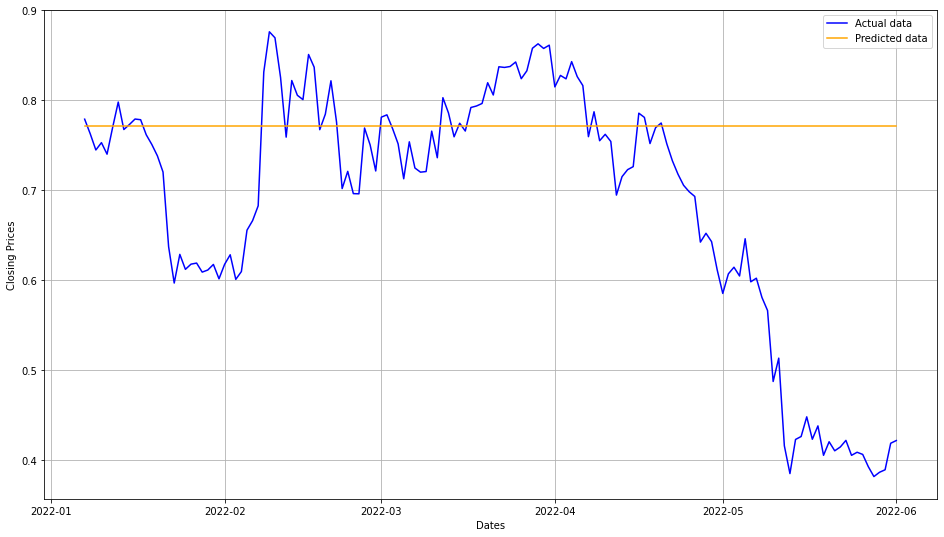

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 21.57%
RMSE: 0.16
R2: -36.36%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2022-01-07,0.77904,0.77137,0.00767
2022-01-08,0.76271,0.77137,-0.00866
2022-01-09,0.74478,0.77137,-0.02659
2022-01-10,0.75294,0.77137,-0.01843
2022-01-11,0.74011,0.77137,-0.03126
...,...,...,...
2022-05-28,0.38155,0.77137,-0.38982
2022-05-29,0.38631,0.77137,-0.38506
2022-05-30,0.38910,0.77137,-0.38227
2022-05-31,0.41861,0.77137,-0.35276


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-0.38982,1.653696e+09
2022-05-29,-0.38506,1.653782e+09
2022-05-30,-0.38227,1.653869e+09
2022-05-31,-0.35276,1.653955e+09
2022-06-01,-0.34975,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(146, 1)
(146, 1)


<h1>Vẽ đồ thị thể hiện sai số

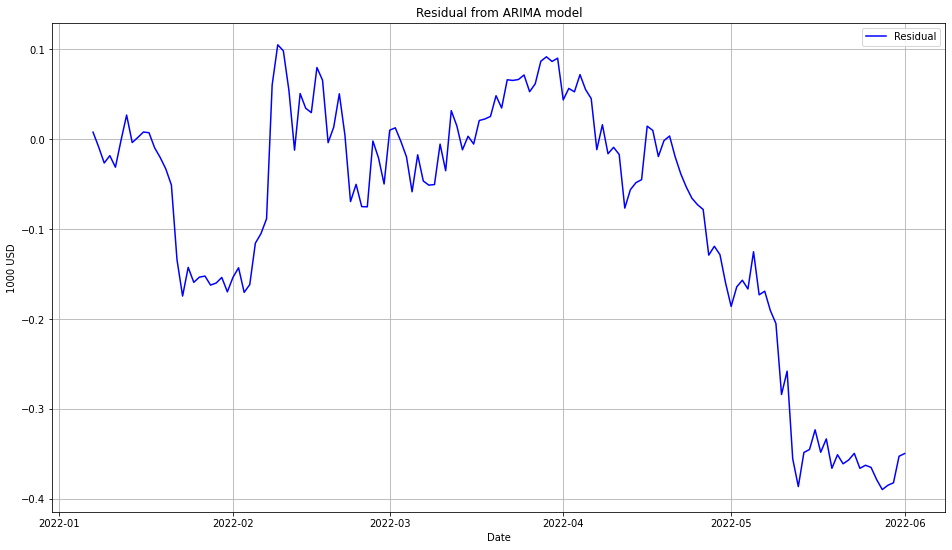

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.01, gamma=1.5000000000000002
MSE=0.00 | RMSE=0.02
SVR(kernel=sigmoid, C=0.

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
194,rbf,0.11,4.8,0,0.00008,0.008916


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 0.44721491,  0.44038502,  0.42804254,  0.41009618,  0.38657636,
        0.35764397,  0.32359569,  0.28486549,  0.24202196,  0.19576135,
        0.14689612,  0.09633925,  0.0450845 , -0.00581675, -0.0552817 ,
       -0.10222442, -0.14558536, -0.18436122, -0.21763406, -0.24459871,
       -0.26458734, -0.27709051, -0.28177364, -0.27848842, -0.26727863,
       -0.24838005, -0.22221453, -0.18937816, -0.15062414, -0.1068408 ,
       -0.05902543, -0.00825505,  0.04434514,  0.09763442,  0.15048926,
        0.20183501,  0.25067559,  0.29612014,  0.33740602,  0.37391732,
        0.40519857,  0.43096319,  0.45109683,  0.4656553 ,  0.47485775,
        0.47907508,  0.47881442,  0.47470015,  0.46745206,  0.45786167,
        0.44676712,  0.43502775,  0.42349872,  0.41300671,  0.4043271 ,
        0.39816317,  0.39512797,  0.39572902,  0.40035628,  0.40927349,
        0.42261304,  0.44037439,  0.462426  ,  0.4885105 ,  0.51825316,
        0.55117312,  0.58669718,  0.62417581,  0.66290082,  0.70

# Vẽ đồ thị

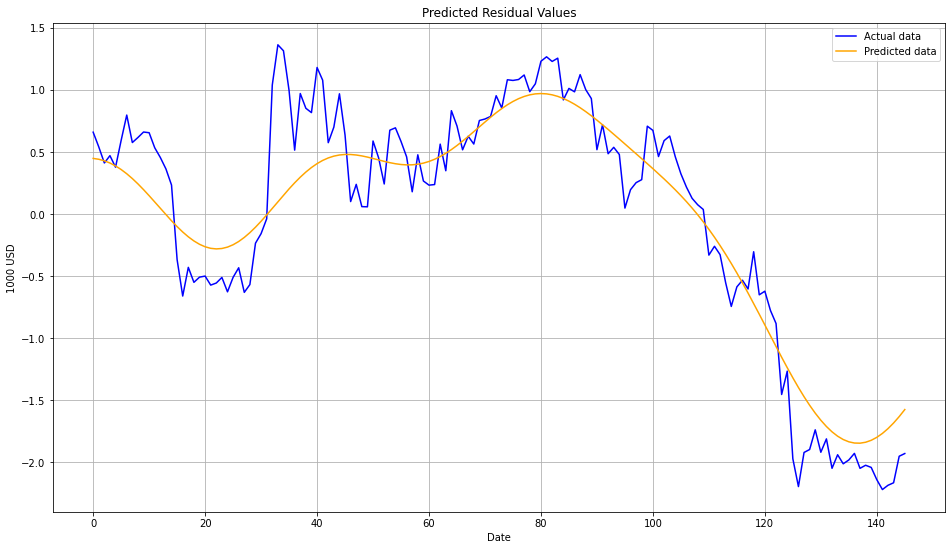

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,0.38155,0.77137,-0.38982,-0.327391,0.443979
2022-05-29,0.38631,0.77137,-0.38506,-0.322041,0.449329
2022-05-30,0.38910,0.77137,-0.38227,-0.315773,0.455597
2022-05-31,0.41861,0.77137,-0.35276,-0.308673,0.462697
2022-06-01,0.42162,0.77137,-0.34975,-0.300836,0.470534


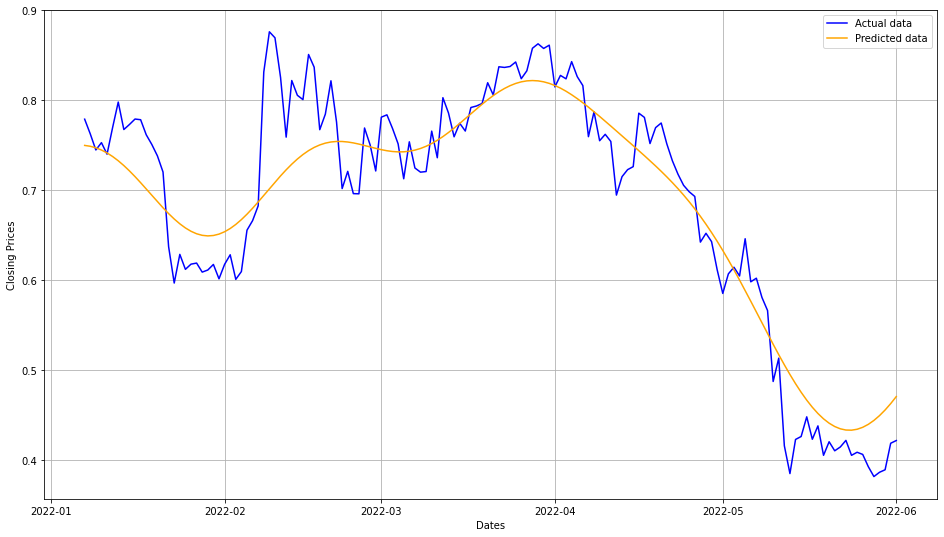

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 0.05
MAPE: 5.59%
R-Squared: 0.89
